In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

# import healpy as hp
import numpy as np
import skyproj
# import proplot as pplt
import matplotlib.pyplot as plt
import fitsio

import rubin_sim
from rubin_sim import maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
# from rubin_sim.utils import raDec2Hpid

from rubin_sim import maf

In [3]:
nside = 128

sm = SkyAreaGenerator(nside=nside)
footprints_hp_array, labels = sm.return_maps()
wfd_indx = np.where((labels == 'lowdust') | (labels == 'virgo'))[0]
wfd_msk = (labels == 'lowdust') | (labels == 'virgo')


def _read_maps(fname):
    data = fitsio.read(fname)
    msk = data < 0
    data[msk] = 0
    for i in range(data.shape[0]):
        data[i, ~wfd_msk] = 0

    return data

seasons = np.arange(-2, 20) - 0.5
seasons = ((seasons[1:] + seasons[:-1]) / 2.0).astype(int)

In [4]:
def _plot_it(fname, prefix, plot_offset=0):

    from rolling_plot_utils import get_sun_ra_at_mjd, BASELINE_SURVEY_START_MJD

    sun_ra = get_sun_ra_at_mjd(BASELINE_SURVEY_START_MJD)
    data = _read_maps(fname)
    vmax = np.max(data[:, :])

    data = np.concatenate([np.zeros_like(data[0:1, :])] * plot_offset + [data], axis=0)

    ncols = 3
    fig, axs = plt.subplots(nrows=5, ncols=ncols+1, figsize=(12, 10))

    for row in range(5):
        start = row * 3
        _axs = axs[row, :]

        for i in range(start, start+ncols):
            ax = _axs[i-start]
            sp = skyproj.MollweideSkyproj(ax=ax, gridlines=False, n_grid_lon=1, n_grid_lat=1)
            sp.draw_hpxmap(data[i, :], vmin=0, vmax=vmax)
            # sp.draw_colorbar(label=f"# of visits", location="bottom", pad=0.05)
            sp.aa.set_title(f"{prefix} season {seasons[i]}", y=1.1)
            sp.ax.plot([sun_ra, sun_ra], [-90, 90], color="red")
            sp.ax.plot([sun_ra + 90, sun_ra + 90], [-90, 90], color="red", linestyle="dashed")
            sp.set_xlabel(None)
            sp.set_ylabel(None)

        ax = _axs[ncols]
        sp = skyproj.MollweideSkyproj(ax=ax, gridlines=False, n_grid_lon=1, n_grid_lat=1)
        sp.draw_hpxmap(
            np.sum(data[start:start+ncols, :], axis=0),
            vmin=0,
            vmax=vmax,
        )
        # sp.draw_colorbar(label=f"# of visits", location="bottom", pad=0.05)
        sp.ax.set_title(f"cumulative {prefix} {seasons[start]} to {seasons[start+ncols-1]}", y=1.1)
        sp.set_xlabel(None)
        sp.set_ylabel(None)
    fig.savefig(f"{fname}_{prefix}_seasons.png", dpi=300)


In [ ]:
"""
roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy-1_usemafFalse_bandi_nside128.fits
roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy0_usemafFalse_bandi_nside128.fits
roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy0_usemafTrue_bandi_nside128.fits
roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy1_usemafFalse_bandi_nside128.fits
"""

_plot_it(
    "roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy1_usemafFalse_bandi_nside128.fits",
    "sched."
)

"""
slice a w/ ra - sun_ra in [270, 90]: 1 1 D U 1 D U 1 D U 1 1 1 1 1 1 1
slice a w/ ra - sun_ra in [90, 270]: 1 1 1 U D 1 U D 1 U D 1 1 1 1 1 1
slice b w/ ra - sun_ra in [270, 90]: 1 1 U D 1 U D 1 U D 1 1 1 1 1 1 1
slice b w/ ra - sun_ra in [90, 270]: 1 1 1 D U 1 D U 1 D U 1 1 1 1 1 1
""";

In [ ]:
_plot_it(
    "roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy0_usemafTrue_bandi_nside128.fits",
    "MAF",
    plot_offset=1,
)

sched+6mo
sched+3mo
sched+0mo
sched-3mo


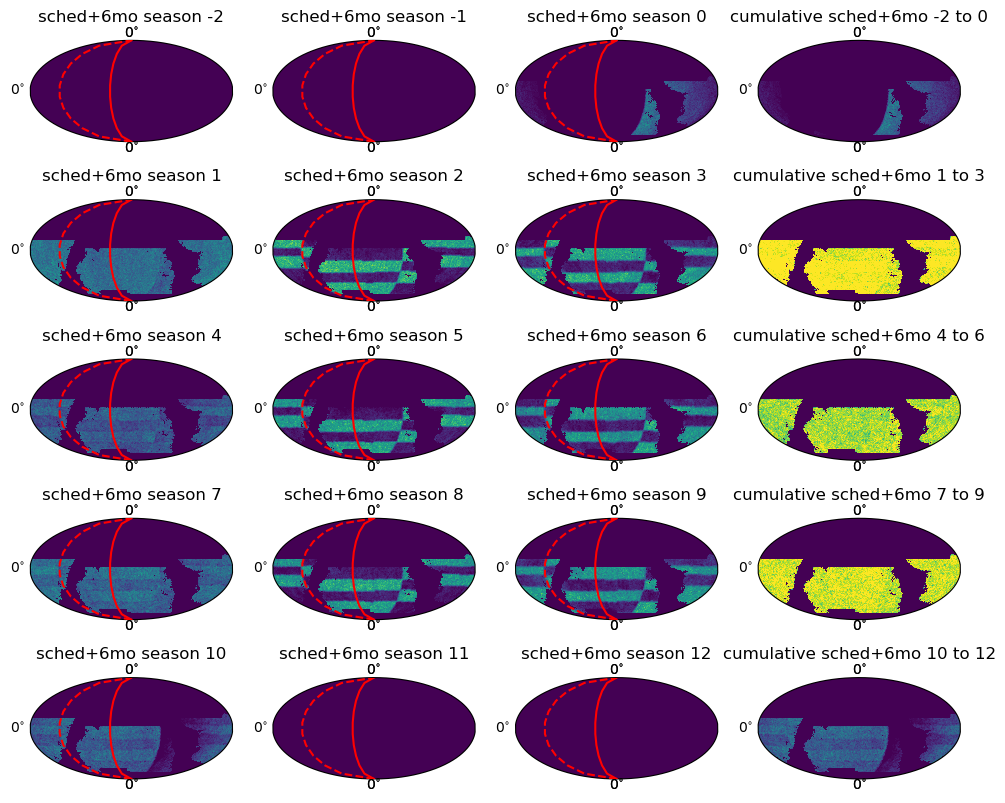

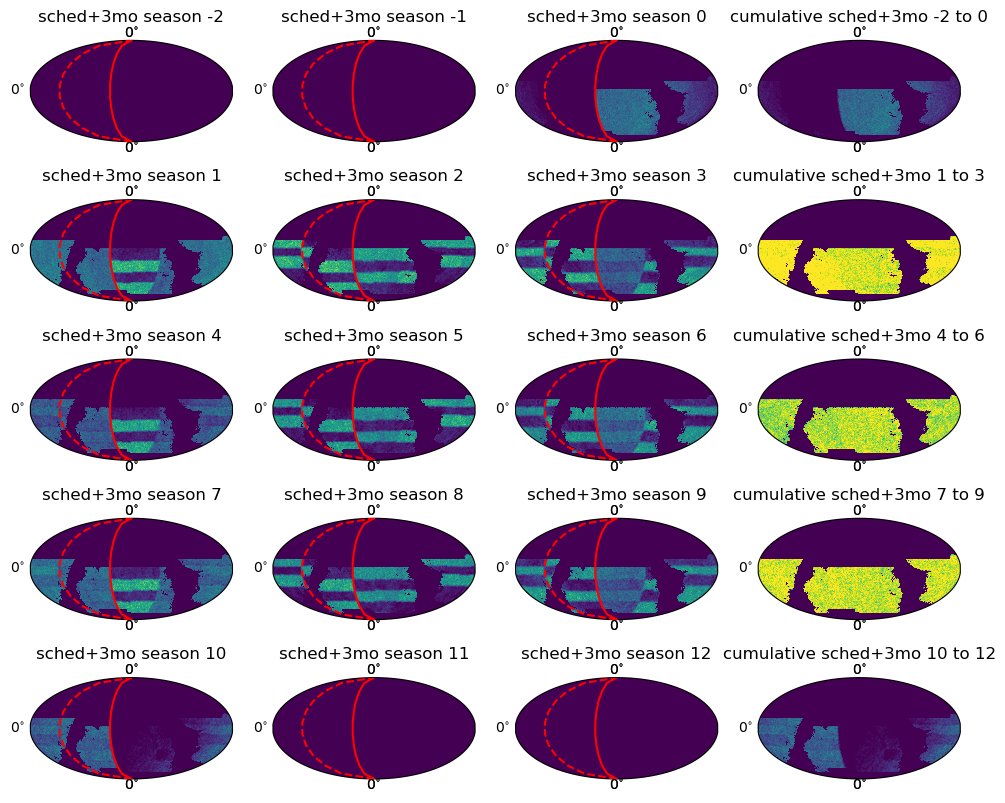

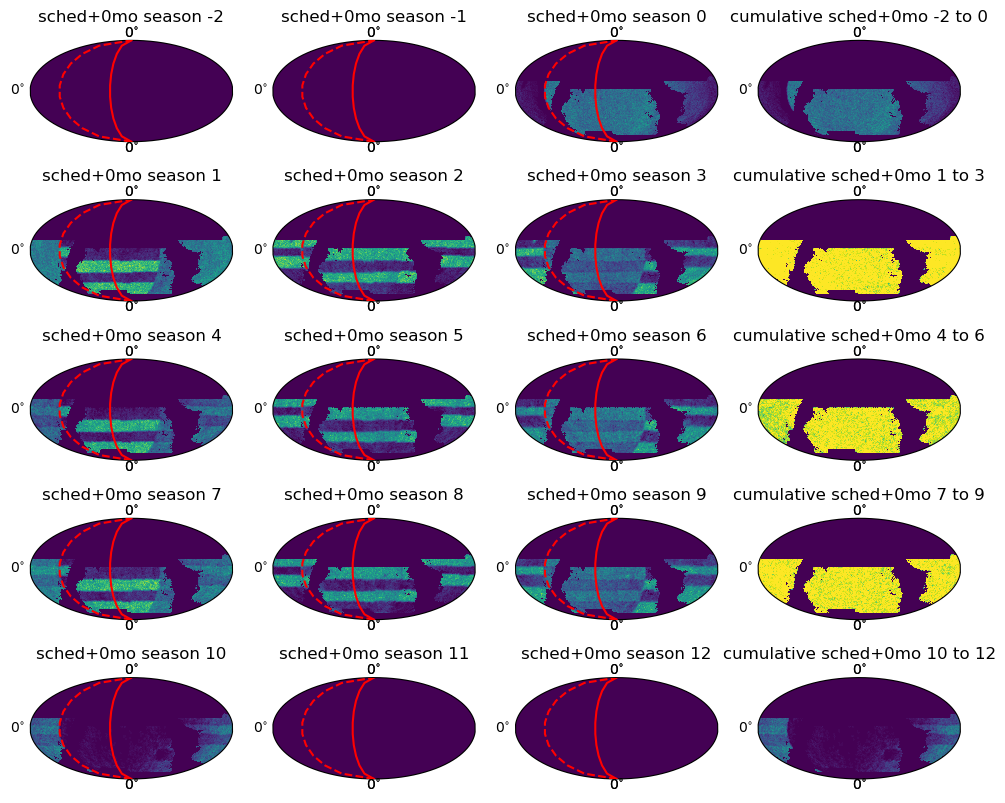

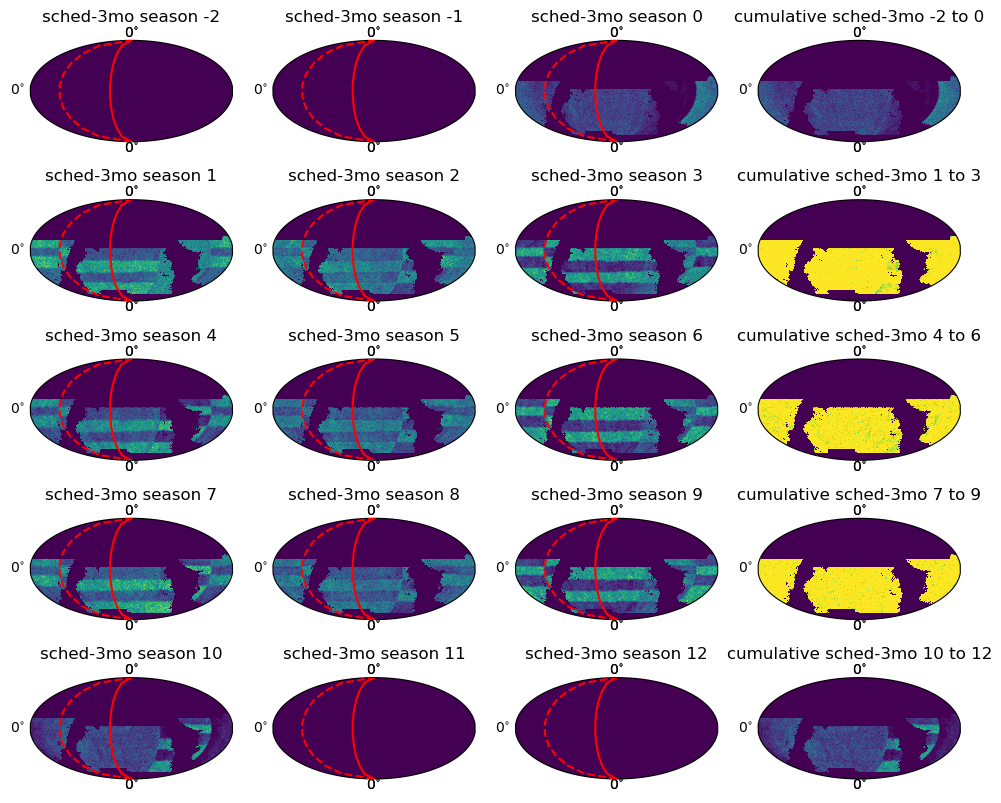

In [6]:
for off in [-1, 0, 1, 2]:
    mo = (1 - off) * 3
    print("sched%+dmo" % mo)
    _plot_it(
        f"roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy{off}_usemafFalse_bandi_nside128.fits",
        "sched%+dmo" % mo
    )

In [ ]:
_plot_it(
    "baseline_v3.4_10yrs_seasons_psqy0_usemafFalse_bandi_nside128.fits",
    "sched. -3mo"
)


In [ ]:

_plot_it(
    "baseline_v3.4_10yrs_seasons_psqy1_usemafFalse_bandi_nside128.fits",
    "sched. +3mo"
)


In [ ]:
_plot_it(
    "baseline_v3.4_10yrs_seasons_psqy0_usemafTrue_bandi_nside128.fits",
    "MAF",
    plot_offset=1,
)

In [ ]:
_plot_it(
    "roll_uniform_early_half_mjdp0_v3.4_10yrs_seasons_psqy-1_usemafFalse_bandi_nside128.fits",
    "MAF",
    plot_offset=0,
)

In [5]:
from season_utils import calc_season
from rolling_plot_utils import get_season, get_sun_ra_at_mjd, BASELINE_SURVEY_START_MJD

In [17]:
days = 0
mjd = BASELINE_SURVEY_START_MJD + days

ra = get_sun_ra_at_mjd(mjd)
dras = [-90, 0, 90, 180]
print(
    "shed. season sun ra + %r:" % dras,
    [
        "%+0.4f" % get_season(mjd, ra + dra, BASELINE_SURVEY_START_MJD)
        for dra in dras
    ],
)

print(
    "  MAF season sun ra + %r:" % dras,
    [
        "%+0.4f" % calc_season(np.atleast_1d(ra + dra), np.atleast_1d(mjd), mjd_start=BASELINE_SURVEY_START_MJD, calc_diagonal=True)[0]
        for dra in dras
    ],
)

shed. season sun ra + [-90, 0, 90, 180]: ['+0.5000', '+0.2500', '+0.0000', '+0.7500']
  MAF season sun ra + [-90, 0, 90, 180]: ['-0.7529', '-0.0029', '-0.2529', '-0.5029']
